# NN

In [13]:
import pickle
from pprint import pprint

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras import layers
from keras.backend import clear_session



#### Import data

In [14]:
# Dataframe
path_df = "../Pickles/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "../Pickles/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "../Pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "../Pickles/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "../Pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)
    


### Remove strings from labels

In [15]:
labels_train.replace(to_replace='topic',value=2,inplace=True)
labels_test.replace(to_replace='topic',value=2,inplace=True)

### Split data

In [16]:
features_train, features_validation, labels_train, labels_validation = train_test_split(features_train, 
                                                    labels_train, 
                                                    test_size=0.20, 
                                                    random_state=8)

### Model train

In [29]:
input_dim = features_train.shape[1]  

model = Sequential()
model.add(layers.Dense(16, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(8, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
clear_session()
history = model.fit(features_train, labels_train,
                     epochs=15,
                     verbose=True,
                     validation_data=(features_validation, labels_validation),
                     batch_size=10)

Epoch 1/15
1185/1185 [==============================] - 2s 1ms/step - loss: 1.1548 - accuracy: 0.7118 - val_loss: 0.6071 - val_accuracy: 0.8265
Epoch 2/15
1185/1185 [==============================] - 1s 1ms/step - loss: 0.4936 - accuracy: 0.8448 - val_loss: 0.4722 - val_accuracy: 0.8380
Epoch 3/15
1185/1185 [==============================] - 1s 1ms/step - loss: 0.3958 - accuracy: 0.8661 - val_loss: 0.4388 - val_accuracy: 0.8431
Epoch 4/15
1185/1185 [==============================] - 1s 1ms/step - loss: 0.3452 - accuracy: 0.8822 - val_loss: 0.4321 - val_accuracy: 0.8407
Epoch 5/15
1185/1185 [==============================] - 1s 1ms/step - loss: 0.3108 - accuracy: 0.8931 - val_loss: 0.4273 - val_accuracy: 0.8417
Epoch 6/15
1185/1185 [==============================] - 1s 1ms/step - loss: 0.2838 - accuracy: 0.9029 - val_loss: 0.4332 - val_accuracy: 0.8383
Epoch 7/15
1185/1185 [==============================] - 1s 1ms/step - loss: 0.2611 - accuracy: 0.9130 - val_loss: 0.4425 - val_accuracy:

### Results

In [30]:
loss, accuracy = model.evaluate(features_test, labels_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.8278


In [31]:
# Classification report
print("Classification report")
y_pred = model.predict(features_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(labels_test, y_pred_bool))

Classification report
100/100 [==============================] - 0s 977us/step
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       855
           1       0.83      0.82      0.82       446
           2       0.73      0.70      0.72       705
           3       0.78      0.78      0.78       751
           4       0.92      0.94      0.93      1110
           5       0.78      0.75      0.77       971
           6       0.92      0.92      0.92       768
           7       0.78      0.80      0.79       742

    accuracy                           0.83      6348
   macro avg       0.82      0.82      0.82      6348
weighted avg       0.83      0.83      0.83      6348



## Confusion matrix
Create confusion matrix to visualize what are the errors of algorithum

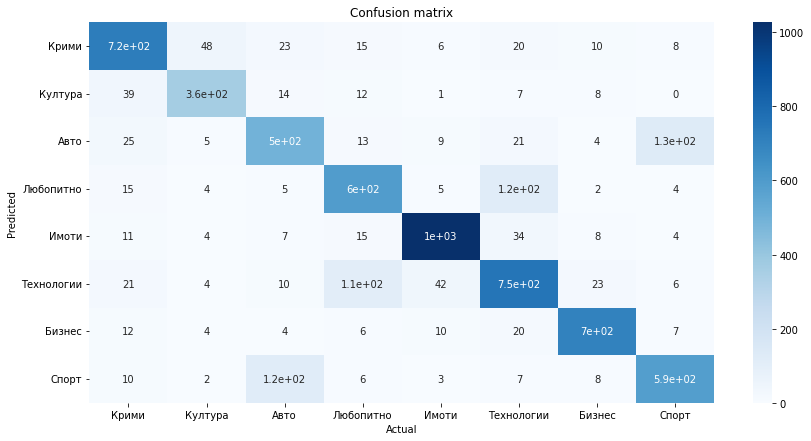

In [25]:
conf_matrix = confusion_matrix(labels_test, y_pred_bool)
plt.figure(figsize=(14,7))
plt.title('Confusion matrix')

sns.heatmap(
    conf_matrix, 
    xticklabels=df['topic'].unique(), 
    yticklabels=df['topic'].unique(),
    cmap="Blues",
    annot=True,
)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()